# Deomnstrations for predictor-corrector in regression and object-tracking example

## Regression model

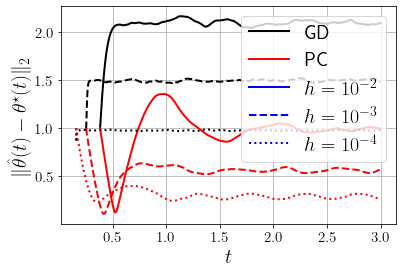

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import regression_model
import numpy as np


nums = [300, 3000, 30000, ]
ltys = ['-', '--', ':',]
lw = 2
labelsize = 20
ticksize = 15

lines = [
    Line2D([0], [0], color = 'k', linestyle='-', linewidth = lw), 
    Line2D([0], [0], color = 'r', linestyle='-', linewidth = lw),
    ]
labels = ['GD', 'PC']
hs = [r'10^{-2}', r'10^{-3}', r'10^{-4}']





for num, lty, hstr in zip(nums, ltys, hs):
    
    t = np.linspace(0, 3, num = num)
    theta_star =  regression_model.true_parameter(t, a = 0, omega = 1)
    
    
    X = np.random.normal(size = (40, 2))
    y = regression_model.observations(X, theta_star, tau = 0.5)
    h = t[1] - t[0]
    eta = h ** (0.3)
    theta_gd, m1 = regression_model.gradient_descend(X, y, h = h, eta  = eta)
    
    eta = h ** (4/5)
    theta_pc, m2, p = regression_model.prediction_correction(X, y, h = h, eta  = eta)
    
    
    
    m = m1
    no_of_steps = theta_gd.shape[0]
    err_gd = np.linalg.norm(theta_star[-no_of_steps:] - theta_gd, axis = -1)
    err_pc = np.linalg.norm(theta_star[-no_of_steps:] - theta_pc, axis = -1)
    plt.plot(t[m-1:], err_gd, color = 'k', linestyle = lty, lw = lw)
    plt.plot(t[m-1:], err_pc, color = 'r', linestyle = lty, lw = lw)
    lines.append(Line2D([0], [0], linestyle = lty, lw = 2, c = 'blue'))
    labels.append(r'$h = ' + hstr + r'$')
    
    
plt.ylabel(r'$\|\hat\theta(t) - \theta^\star(t)\|_2$', fontsize=labelsize)
plt.xlabel(r'$t$', fontsize=labelsize)
plt.legend(lines, labels, fontsize=labelsize)
plt.tick_params('both', labelsize = ticksize)
plt.grid()

## Object tracking

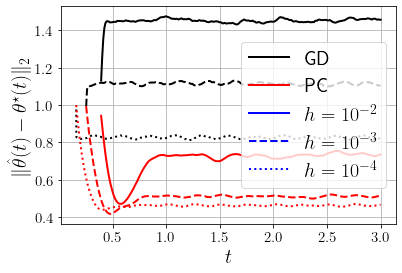

In [2]:
import object_tracking
import numpy as np

nums = [300, 3000, 30000, ]
ltys = ['-', '--', ':',]
lw = 2
labelsize = 20
ticksize = 15

lines = [
    Line2D([0], [0], color = 'k', linestyle='-', linewidth = lw), 
    Line2D([0], [0], color = 'r', linestyle='-', linewidth = lw),
    ]
labels = ['GD', 'PC']
hs = [r'10^{-2}', r'10^{-3}', r'10^{-4}']

for num, lty, hstr in zip(nums, ltys, hs):

    t = np.linspace(0, 3, num = num)
    theta_star =  object_tracking.true_parameter(t, a = 0, omega = 1)


    xgrid = np.arange(-1, 1.1, step = 0.2)
    ygrid = np.arange(-1, 1.1, step = 0.2)
    XG, YG = np.meshgrid(xgrid, ygrid)
    XG = XG.reshape((-1, ))
    YG = YG.reshape((-1, ))

    X = np.vstack((XG, YG))
    X = X.T


    y = object_tracking.observations(X, theta_star, tau = 0.5)
    h = t[1] - t[0]
    eta = h ** (0.3)
    theta_gd, m1 = object_tracking.gradient_descend(X, y, h = h, eta  = eta)

    eta = h ** (4/5)
    theta_pc, m2, p = object_tracking.prediction_correction(X, y, h = h, eta  = eta)
    
    no_of_steps = m1
    err_gd = np.linalg.norm(theta_star[no_of_steps:] - theta_gd[no_of_steps:], axis = -1)
    err_pc = np.linalg.norm(theta_star[no_of_steps:] - theta_pc[no_of_steps:], axis = -1)
    plt.plot(t[no_of_steps:], err_gd, color = 'k', linestyle = lty, lw = 2)
    plt.plot(t[no_of_steps:], err_pc, color = 'r', linestyle = lty, lw = 2)
    lines.append(Line2D([0], [0], linestyle = lty, lw = 2, c = 'blue'))
    labels.append(r'$h = ' + hstr + r'$')
    
    
plt.ylabel(r'$\|\hat\theta(t) - \theta^\star(t)\|_2$', fontsize=labelsize)
plt.xlabel(r'$t$', fontsize=labelsize)
plt.legend(lines, labels, fontsize=labelsize)
plt.tick_params('both', labelsize = ticksize)
plt.grid()